In [49]:
import json
import pandas as pd
import numpy as np
import networkx as nx
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from math import log
import statistics as st
from joblib import Parallel, delayed
import os
 
threads = os.cpu_count()

In [50]:
target = "cs"
G = nx.read_gml("../data/{0}/{0}_coauthorship_network.gml".format(target))
node_attributes = nx.get_node_attributes(G, "affiliation")

---

# Centrality measures

### Degree Centrality

Degree centrality measures the importance of a node in a network based on the number of connections it has.

Interpretation:
The table shows the top 10 nodes with the highest degree centrality in the network.

Implications:
Nodes with higher degree centrality are more connected within the network.
These individuals play a crucial role in maintaining connections across different parts of the network.

Considerations:
The interpretation of degree centrality should be analyzed in conjunction with the specific goals and characteristics of the network.

In [51]:
degree_centrality = nx.degree_centrality(G)
dc_data = pd.DataFrame({"Name": list(degree_centrality.keys()),
                        "Affiliation": [node_attributes[node] for node in degree_centrality.keys()],
                        "DegreeCentrality": list(degree_centrality.values())
                        }).sort_values(by="DegreeCentrality", ascending=False).reset_index(drop=True)

dc_data.head(10)

,Name,Affiliation,DegreeCentrality
0,"BONONI, LUCIANO",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.142276
1,"SALMON CINOTTI, TULLIO",CENTRO RICERCA SISTEMI ELETTRONICI INGEGN.INF....,0.119919
2,"MARFIA, GUSTAVO",DIPARTIMENTO DELLE ARTI,0.119919
3,"VITALI, FABIO",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.111789
4,"DI FELICE, MARCO",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.109756
5,"BARTOLINI, ILARIA",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.099593
6,"BAZZANI, ARMANDO","DIPARTIMENTO DI FISICA E ASTRONOMIA ""AUGUSTO R...",0.089431
7,"BELLAVISTA, PAOLO",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.089431
8,"TORRONI, PAOLO",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.081301
9,"ROCCETTI, MARCO",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.079268


### Betweenness Centrality

Weighted betweenness centrality measures the influence of a node in facilitating communication between other nodes, considering the weights of edges.

Interpretation:
The table shows the top 10 nodes with the highest weighted betweenness centrality in the network.

Implications:
Nodes with higher weighted betweenness centrality act as bridges, connecting different parts of the network.
These individuals play a crucial role in maintaining efficient communication paths considering edge weights.

In [52]:
weighted_betweenness_centrality = nx.betweenness_centrality(G, weight="weight")

wbc_data = pd.DataFrame({"Name": list(weighted_betweenness_centrality.keys()),
                        "Affiliation": [node_attributes[node] for node in weighted_betweenness_centrality.keys()],
                        "WeightedBetweennessCentrality": list(weighted_betweenness_centrality.values())
                        }).sort_values(by="WeightedBetweennessCentrality", ascending=False).reset_index(drop=True)

wbc_data.head(10)

,Name,Affiliation,WeightedBetweennessCentrality
0,"TOMASI, FRANCESCA",DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...,0.163943
1,"LOLI PICCOLOMINI, ELENA",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.157832
2,"MARFIA, GUSTAVO",DIPARTIMENTO DELLE ARTI,0.154433
3,"BARTOLINI, ILARIA",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.140926
4,"ASPERTI, ANDREA",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.139090
5,"VITALI, FABIO",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.133884
6,"DEGLI ESPOSTI, MIRKO","DIPARTIMENTO DI FISICA E ASTRONOMIA ""AUGUSTO R...",0.133572
7,"BAZZANI, ARMANDO","DIPARTIMENTO DI FISICA E ASTRONOMIA ""AUGUSTO R...",0.125704
8,"MARTINI, SIMONE",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.111018
9,"ROCCETTI, MARCO",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.095308


### Closeness Centrality

Weighted closeness centrality measures how easily a node can reach other nodes in the network, considering the weights of the edges.

Interpretation:
The table displays the top 10 nodes with the highest weighted closeness centrality in the network.

Implications:
Nodes with higher weighted closeness centrality are well-connected and can efficiently reach other nodes in the network, considering edge weights.
These individuals play a crucial role in information flow and communication.

In [53]:
weighted_closeness_centrality = nx.closeness_centrality(G, distance="weight")

wcc_data = pd.DataFrame({"Name": list(weighted_closeness_centrality.keys()),
                        "Affiliation": [node_attributes[node] for node in weighted_closeness_centrality.keys()],
                        "WeightedClosenessCentrality": list(weighted_closeness_centrality.values())
                        }).sort_values(by="WeightedClosenessCentrality", ascending=False).reset_index(drop=True)

wcc_data.head(10)

,Name,Affiliation,WeightedClosenessCentrality
0,"CONDELLO, FEDERICO",DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...,0.223332
1,"MARTINI, SIMONE",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.222826
2,"TOMASI, FRANCESCA",DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...,0.221622
3,"ROCCETTI, MARCO",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.220529
4,"BARTOLINI, ILARIA",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.218764
5,"MARFIA, GUSTAVO",DIPARTIMENTO DELLE ARTI,0.214379
6,"VITALI, FABIO",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.212987
7,"DEGLI ESPOSTI, MIRKO","DIPARTIMENTO DI FISICA E ASTRONOMIA ""AUGUSTO R...",0.212527
8,"BONONI, LUCIANO",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.210797
9,"ASPERTI, ANDREA",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.209898


### Eigenvector centrality

Weighted eigenvector centrality assesses the importance of a node in a network, considering both the network topology and the weights of its connections.

Why it Changes:
Edge Weights Influence Strength:

Nodes with strong connections (lower weights) contribute more to the eigenvector centrality of their neighbors. The weights influence the flow of influence through the network.

Weighted Paths Matter:
Paths with lower weights contribute more to the eigenvector centrality. If a node is connected to nodes with strong connections, its centrality increases.
Higher Eigenvector Centrality for Some Nodes:

Implications:
Nodes with higher weighted eigenvector centrality are influential in the network, considering both the structure and weights of connections.
These individuals play a significant role in information flow and network dynamics

In [54]:
weighted_eigenvector_centrality = nx.eigenvector_centrality(G, weight="weight")

wec_data = pd.DataFrame({"Name": list(weighted_eigenvector_centrality.keys()),
                        "Affiliation": [node_attributes[node] for node in weighted_eigenvector_centrality.keys()],
                        "WeightedEigenvectorCentrality": list(weighted_eigenvector_centrality.values())
                        }).sort_values(by="WeightedEigenvectorCentrality", ascending=False).reset_index(drop=True)

wec_data.head(10)

,Name,Affiliation,WeightedEigenvectorCentrality
0,"DI FELICE, MARCO",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.568878
1,"BONONI, LUCIANO",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.562206
2,"BEDOGNI, LUCA",AFORM - AREA FORMAZIONE E DOTTORATO,0.371572
3,"TROTTA, ANGELO",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.256683
4,"SALMON CINOTTI, TULLIO",CENTRO RICERCA SISTEMI ELETTRONICI INGEGN.INF....,0.219370
5,"MONTORI, FEDERICO",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.175792
6,"D'ELIA, ALFREDO",CENTRO RICERCA SISTEMI ELETTRONICI INGEGN.INF....,0.136345
7,"SCIULLO, LUCA",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.104689
8,"GIGLI, LORENZO",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.065988
9,"BELLAVISTA, PAOLO",DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...,0.062306


---

# Topological and Structural analysis

### Small-worldness


There are two main ways to quantify the small-worldness of a network:
- Computing the small-world measure $\sigma$ by comparing clustering and path length of a given network to an equivalent random network with same degree on average.
- Computing the small-world measure $\omega$ by comparing the clustering of a given network to an equivalent lattice network and its path length to an equivalent random network.

$\sigma$ is defined as:

$$\sigma= \dfrac{\dfrac{C}{C_r}}{\dfrac{L}{L_r}}$$

Where $C$ is the clustering coefficient of our network and $C_r$ is the clusetering coefficient of an equivalent random graph, while $L$ and $L_r$ are the average shortest path values for our network and an equivalent random graph, respectively.

A graph is commonly classified as small-world if $\sigma \gt 1$ $(C ≫ C_r$ $and$ $L ≈ L_r)$.

$\omega$ is defined as:

$$\omega=\dfrac{L_r}{L}-\dfrac{C}{C_l}$$

Where $C$ and $L$ are respectively the average clustering coefficient and average shortest path length of our network, while $L_r$ is the average shortest path length of an equivalent random graph and $C_l$ is the average clustering coefficient of an equivalent lattice graph.

Negative values of $\omega$ mean that our network is similar to a lattice, whereas positive values mean that it is more likely to be similar to a random graph. Values close to 0 mean that it has small-world characteristics.

### Computing the small-world coefficient $\sigma$

In [55]:
C = nx.average_clustering(G)

equivalent_random_graph = nx.erdos_renyi_graph(G.number_of_nodes(), p=np.mean([d for _, d in G.degree()]) / (nx.number_of_nodes(G) - 1))
C_random = nx.average_clustering(equivalent_random_graph)

# Compute average L for each connected component of the network
L_list = [nx.average_shortest_path_length(G.subgraph(n).copy()) for n in nx.connected_components(G)]

if len(L_list) > 1:
    computable_L_list = [L for L in L_list if L != 1.0] # remove the 0 values
    if len(computable_L_list) == 1:
        L = computable_L_list[0]
    else:
        L = st.mean(computable_L_list)
else:
    L = L_list[0]

L_random = nx.average_shortest_path_length(equivalent_random_graph)

print("C = ", C)
print("Cr = ", C_random)
print("L = ", L)
print("Lr = ", L_random)

sigma = ((C / C_random) / (L / L_random))
print("Sigma = ", sigma)

NetworkXError: Graph is not connected.

### Computing the small-world coefficient $\omega$

In [ ]:
random_lattice_graph = nx.lattice_reference(nx.watts_strogatz_graph(G.number_of_nodes(), k=4, p=0))
omega = ((L_random / L) - (C / nx.average_clustering(random_lattice_graph)))

print("C = ", C)
print("Cl = ", nx.average_clustering(random_lattice_graph))
print("L = ", L)
print("Lr = ", L_random)

print("Omega = ", omega)

C =  0.7615676461291595
Cl =  0.5
L =  3.979608832599482
Lr =  3.1594353468889658
Omega =  -0.7292292879776869


### Scale freedom

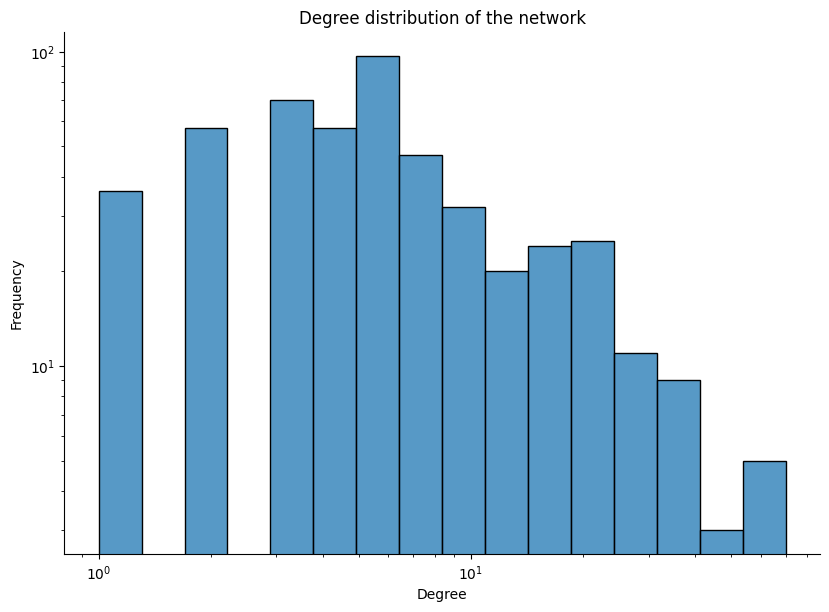

In [ ]:
degree_distribution_list = [G.degree(node) for node in G]
dist_df = pd.DataFrame({'degree': degree_distribution_list})

sns.displot(dist_df['degree'], height=6, aspect=7/5, log_scale=(True, True)).set(
    xlabel='Degree',
    ylabel='Frequency',
    title=f'Degree distribution of the network'
)

To be sure that our conclusions are not based on biased visual interpretations, we measure how close our distribution is to a power law distribution by compute the scaling coefficient $\alpha$ as follows:

$$\alpha=1+n(\sum_i ln \frac{d_i}{d_{min}-1/2})^{-1}$$

Where:
- $n$ is the number of nodes in our network.
- $d_i$ is the degree of the node $i$.
- $d_{min}$ is the minimum degree found in our graph.

Finding an $\alpha$ value such that $2 \le \alpha \le 3$ means that our network is a scale free newtork.

In [56]:
degree_distribution_list = [G.degree(node) for node in G]

n = len(degree_distribution_list)
sum_val = sum(np.log(degree / (min(degree_distribution_list) - 1/2)) for degree in degree_distribution_list)

alpha = 1 + n * sum_val ** -1
print("Alpha =", alpha)

Alpha = 1.425250169228711



---

# Other measures

### Clustering

In [57]:
clustering = nx.clustering(G, weight="weight")
clustering_data = pd.DataFrame.from_dict(clustering, 
                                columns=["Clustering"],
                                orient="index")
clustering_data.sort_values(by=["Clustering"], ascending=False)

,Clustering
"MONTALI, MARCO",0.108872
"LUCCHI, ROBERTO",0.091796
"MONTECCHIARI, LEONARDO",0.071099
"BRACUTO, MICHELE",0.064661
"ROUHI, RAHIMEH",0.064291
...,...
"GABBRIELLINI, SIMONE",0.000000
"YAGLIKCI, NEFISE GIZEM",0.000000
"LINARES ZAILA, YISLEIDY",0.000000
"BURATTI, GIACOMO",0.000000


The weighted clustering coefficient measures the tendency of nodes in a network to form clusters or groups, taking into account the strengths of connections.

Interpretation:
The table presents nodes with their corresponding weighted clustering coefficients, indicating the level of clustering around each node.

Implications:
Nodes with higher weighted clustering coefficients have a greater tendency to form tightly-knit clusters in the network.
These individuals may be central in cohesive groups, indicating potential community structures.

Considerations:
A higher weighted clustering coefficient suggests stronger connections within local neighborhoods of nodes.

In [58]:
avg_cohesion = nx.average_clustering(G, weight="weight")
print("Cohesion: ", avg_cohesion)

Cohesion:  0.014078158686333917


The result avg_cohesion = 0.014078158686333917 represents the average clustering coefficient of the graph G when considering edge weights (weight="weight"). Let's break down the interpretation:

Clustering Coefficient:
The clustering coefficient measures the tendency of nodes in a graph to form clusters or groups.

Average Clustering Coefficient:
The average clustering coefficient is the average of the local clustering coefficients across all nodes in the graph.

It ranges from 0 to 1, where:
0 indicates no clustering (nodes are not connected in clusters).
1 indicates maximum clustering (all neighbors of a node are connected to each other).

Interpretation:
In your case, the average clustering coefficient is approximately 0.0141.
This suggests a relatively low level of clustering in the graph when considering edge weights.
Nodes in the graph do not form dense local clusters, indicating a more sparse and interconnected network.

Implications:
Sparse Connectivity: The low average clustering coefficient might indicate that the graph has a sparse or decentralized structure when considering edge weights.

Potential Isolation: Nodes may have connections, but these connections do not necessarily form tight-knit groups or communities.

Considerations:
The interpretation may vary based on the nature and purpose of your network.

Depending on your specific domain or application, a low average clustering coefficient might be expected or might raise further questions about the structure of the graph.

In [59]:
num_connected_components = nx.number_connected_components(G)
print("Connectedness: ", num_connected_components)

Connectedness:  1


Interpretation:
The network consists of 1 connected component.

Observations:
A single connected component implies that all nodes in the network are connected, forming a unified structure.

Implications:
Information and influence can easily flow between any pair of nodes within the network.
The network is highly cohesive and lacks isolated clusters of nodes.

Considerations:
The connectedness of the network may impact information diffusion, collaboration, and overall communication dynamics.
Understanding the connected components helps in assessing the global structure of the network.

In [60]:
def calc_compactness(graph):
    shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(graph))

    total_compactness = 0
    total_pairs = 0

    for source, lengths in shortest_path_lengths.items():
        for target, distance in lengths.items():
            if source != target:
                total_compactness += 1 / distance
                total_pairs += 1

    if total_pairs == 0:
        return 0  # Avoid division by zero

    return total_compactness / total_pairs

compactness = calc_compactness(G)
print("Compactness: ", compactness)

Compactness:  0.28515237325619924


Compactness in a network refers to the efficiency of information flow, indicating how closely connected nodes are to each other.

Interpretation:
The compactness of the network is approximately 0.285.

Observations:
A compactness value closer to 1 suggests a highly interconnected network with efficient information flow.
A lower compactness value, like the one observed, indicates a network with some level of separation between nodes.

Implications:
The network may have distinct clusters or communities that are not fully connected.
Information diffusion may encounter some barriers, affecting the overall efficiency of communication.

Considerations:
Assessing compactness helps in understanding how well the network facilitates the exchange of information.
Depending on the network's purpose, a certain level of separation between nodes may be expected or could be an area for improvement.

In [61]:
transitivity = nx.transitivity(G)
print("Transitivity: ", transitivity)

Transitivity:  0.4332347525249707


Network Transitivity Analysis:
Transitivity in a network measures the likelihood that two nodes connected to the same node are also connected to each other. It provides insights into the clustering tendency of nodes.

Interpretation:
The transitivity of the network is approximately 0.433.

Observations:
Transitivity values range from 0 to 1.
A higher transitivity indicates a higher probability of nodes forming clusters.

Implications:
The network exhibits a moderate level of clustering.
Nodes in the network are somewhat likely to form local clusters or groups.

Considerations:
A higher transitivity might suggest the presence of well-defined communities.
The interpretation may vary based on the specific goals and characteristics of the network.

In [62]:
core_number = nx.core_number(G)
k_data = pd.DataFrame.from_dict(core_number,
                                    columns=["KCore"],
                                    orient="index")
k_data.sort_values(by=["KCore"], ascending=False)

,KCore
"CORRADI, ANTONIO",22
"LONGO, DANILA",22
"TARCHI, DANIELE",22
"NAPOLITANO, FABIO",22
"NUCCI, CARLO ALBERTO",22
...,...
"CONCER, NICOLA",1
"DEGLI ESPOSTI, PIERGIORGIO",1
"GUIDOTTI, LAURA",1
"SANDRI, GIORGIO",1


K-core decomposition is a graph analysis method that identifies the core of a network by iteratively removing nodes with the lowest degrees.

Interpretation:
The K-Core decomposition reveals core numbers for each node, representing the level of connectedness within the network.

Observations:
Nodes in the network are assigned a K-Core value, where higher values indicate a stronger level of connectivity within the core structure.

Implications:
Nodes with higher core numbers play a more central role in maintaining the overall connectivity of the network.
The network's core structure is essential for understanding its robustness and resilience.

Considerations:
K-core decomposition helps identify the backbone of the network.
Core numbers can provide insights into the hierarchical organization of nodes.

Note:
The K-core decomposition results in core numbers ranging from 1 to 22. Higher core numbers indicate nodes with increased connectivity within the core structure, highlighting their importance in maintaining network integrity

In [63]:
communities = nx.algorithms.community.greedy_modularity_communities(G, weight="weight")
community_mapping = {}
for i, community in enumerate(communities):
    for node in community:
        community_mapping[node] = i

modularity_value = nx.algorithms.community.modularity(G, list(communities), weight="weight")

print("Modularity:", modularity_value)

c_data = pd.DataFrame.from_dict(community_mapping,
                                columns=["Communities"],
                                orient="index")
c_data.sort_values(by=["Communities"], ascending=False)

Modularity: 0.7668746704028047


,Communities
"KIZILTAN, ZEYNEP",11
"NETTI, ALESSIO",11
"BALLIU, ALKIDA",11
"MARZOLLA, MORENO",11
"BORGHESI, ANDREA",11
...,...
"SOLMI, RICCARDO",0
"BASILE, VALERIO",0
"SAPIENZA, SALVATORE",0
"LODI, GIORGIA",0


Greedy Modularity Communities:

Community Assignment:
The algorithm assigns nodes to communities based on the concept of modularity, aiming to maximize the quality of community structure.
Each node is placed in the community that results in the highest increase in modularity.

Community Mapping:
The result you provided is a mapping of nodes to their assigned communities, represented by numeric labels (e.g., 14, 13, 12).
Each node is associated with the community to which it belongs.

Interpreting the Results:

Community Labels: Nodes with the same label (e.g., 11) belong to the same community.

Community Sizes: Some communities might have more members than others. For example, nodes labeled 0 may represent smaller or less cohesive communities.

Modularity and Weighted Graphs:

Modularity Definition: Modularity measures the quality of a network's division into communities. Higher modularity values indicate a better community structure.

Weighted Graphs: When the graph is weighted, the strength of connections between nodes is considered. Weighted modularity takes into account both the presence and strength of edges.

Why Weight Changes the Result:

Edge Strength Influence: In a weighted graph, the strength of connections can significantly impact community detection.

Community Formation: Nodes may be more likely to be grouped together if they share strong weighted connections.

Optimization Objective: The algorithm aims to optimize the modularity score by adjusting community assignments. Weighted edges contribute to this optimization differently than unweighted edges.

Greedy Modularity Algorithm:

Basic Idea: Greedy Modularity algorithms iteratively add or remove nodes from communities to maximize the modularity score.

Steps:

Start with each node in its own community.
Greedily merge or split communities to maximize the modularity score.
Repeat until modularity cannot be further improved.
Considerations:

The choice of community detection algorithm depends on the specific characteristics and goals of your network.

The interpretation of community assignments may be context-dependent, and the results should be analyzed in conjunction with domain knowledge.

In [64]:
def homophily(G):
    num_same_ties = 0
    num_diff_ties = 0
    for n1, n2 in G.edges():
        if G.nodes[n1]['affiliation'] == G.nodes[n2]['affiliation']:
            num_same_ties += 1
        else:
            num_diff_ties += 1
    return (num_same_ties / (num_same_ties + num_diff_ties))
print("Homophily:", homophily(G))

Homophily: 0.33466733366683343


Homophily is a measure that assesses the tendency of nodes in a network to connect with others that share similar attributes.

Interpretation:
The calculated homophily coefficient of approximately 0.3347 suggests a moderate level of homophily in the network.

Observations:
The homophily coefficient represents the proportion of edges connecting nodes with similar affiliations compared to all edges in the network.

Implications:
A homophily coefficient greater than 0.5 would indicate a high tendency for nodes to connect with others of the same affiliation.
A coefficient around 0.3347 suggests a moderate, yet discernible, level of homophily.

Considerations:
Homophily coefficients close to 0 indicate a lack of preference for connections between nodes with similar attributes.
Understanding homophily helps in characterizing the social or organizational structure of the network.

Note:
The homophily coefficient of 0.3347 implies that nodes in the network are moderately inclined to form connections with others who share the same affiliation.